In [20]:
# ładowanie pliku
import pandas as pd
df = pd.read_csv("data/student-mat.csv", sep=";")
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [21]:
# Cel
y = df["G3"]

In [22]:
# Dane
X = df[["G1","G2"]]

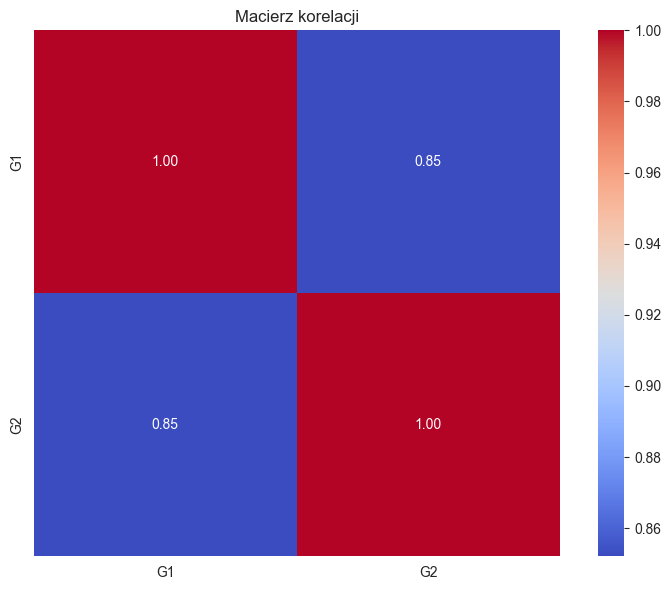

In [23]:
# Heatmap
import matplotlib.pyplot as plt
import seaborn as sns
corr_matrix = X.corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", square=True)
plt.title("Macierz korelacji")
plt.tight_layout()
plt.show()

In [24]:
# Podział danych
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
# Model
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [26]:
# Sprawdzenie modelu
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)

print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

MSE: 4.2118674966017595
R² Score: 0.7945936216805897


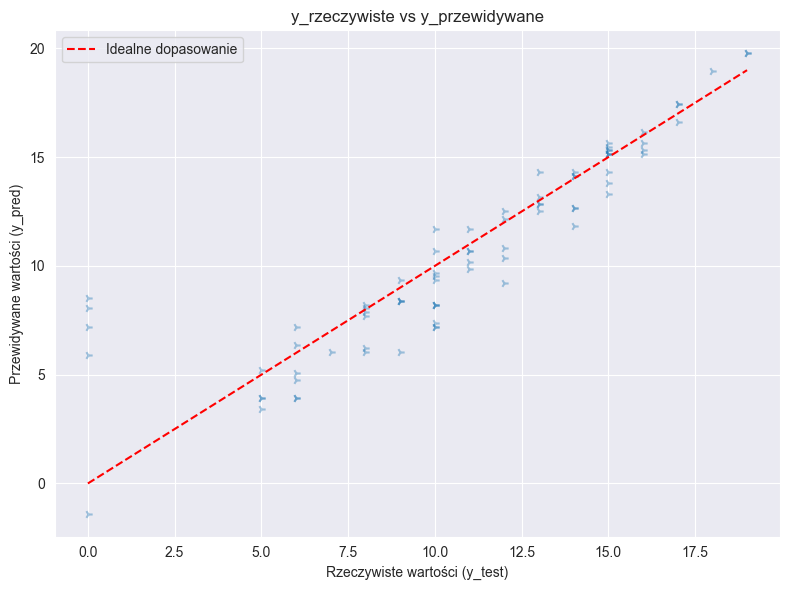

In [27]:
# Wykres y_rzeczywiste vs y_przewidywane
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.4, marker='4' )
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--", label="Idealne dopasowanie")
plt.xlabel("Rzeczywiste wartości (y_test)")
plt.ylabel("Przewidywane wartości (y_pred)")
plt.title("y_rzeczywiste vs y_przewidywane")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()